**Распознавание рукописного ввода на примере базы MNIST**

Построить классификатор изображений рукописного ввода на базе MNIST.
Классификатор предлагается строить на признаках, полученных в результате предобработки изображений, например, гистограммы градиентов (HOG) или результат PCA преобразования.

В качестве модели классификатора можно использовать любую известную Вам модель, за исключением сверточных нейронных сетей.

Критерием качества классификатора является метрика accuracy. Для получения зачета по данной работе, значение метрики accuracy должно быть больше 0.6. Метрика оценивается на тестовой выборке в рамках контеста [Digit Recognizer ](https://www.kaggle.com/c/digit-recognizer) на Kaggle.

#Загрузка и подготовка данных

In [ ]:
import numpy as np
import cv2
from sklearn import svm
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
train = np.loadtxt('train.csv', delimiter=',', skiprows=1)
test = np.loadtxt('test.csv', delimiter=',', skiprows=1)

In [ ]:
# сохраняем разметку в отдельную переменную
train_label = train[:, 0].astype(np.int64)
# приводим размерность к удобному для обаботки виду
train_img = np.resize(train[:, 1:], (train.shape[0], 28, 28))
test_img = np.resize(test, (test.shape[0], 28, 28))

Модель SVM (Support Vector Machine) - это метод машинного обучения, который используется для задач классификации и регрессии. SVM строит гиперплоскость или набор гиперплоскостей в многомерном пространстве, которые разделяют данные разных классов наиболее оптимальным образом.

Основная идея модели SVM заключается в нахождении гиперплоскости, которая максимально разделяет данные разных классов и имеет наибольшую маржу (расстояние от гиперплоскости до ближайших точек обучающих данных). SVM может работать в линейном пространстве, где гиперплоскость является линейной, или в нелинейном пространстве, где гиперплоскость строится с использованием ядерных функций.

Для данного датасета MNIST, где мы решаем задачу классификации изображений рукописных цифр, выбираем модель SVM по нескольким причинам:

1. SVM хорошо работает с высокоразмерными данными: Изображения рукописных цифр из датасета MNIST имеют размерность 8x8, что дает 64 признака. SVM способен хорошо работать с такими высокоразмерными данными и эффективно обрабатывать их.

2. SVM является эффективным для задач с разделяющей границей: SVM строит границу между классами, максимизируя маржу, что позволяет лучше разделять данные разных классов. Для задачи классификации рукописных цифр, где объекты разделены в пространстве, SVM может быть эффективным выбором.

3. SVM может работать как в линейном, так и в нелинейном пространстве: SVM может использовать ядерные функции, чтобы работать с данными в нелинейных пространствах. Это позволяет модели SVM адаптироваться к сложным зависимостям между признаками и целевой переменной.

4. SVM обладает хорошей обобщающей способностью: SVM обладает хорошей способностью к обобщению и может показывать хорошую производительность на новых, неизвестных данных. Это важно для построения модели классификации, которая будет правильно классифицировать рукописные цифры, которые не были использованы в обучающей выборке.

В связи с этими преимуществами и соображениями, выбрем модель SVM для решения задачи классификации рукописных цифр на датасете MNIST.

#Local Binary Patterns (LBP)

Local Binary Patterns (LBP) - это метод предобработки изображений, который используется для извлечения текстурных признаков. Он основан на анализе локальных шаблонов яркости пикселей в изображении. LBP описывает локальные текстурные особенности, такие как границы, углы и текстуры.

Процесс вычисления LBP состоит из следующих шагов:

1. Предобработка изображения: Изначально, изображение преобразуется в черно-белый формат (если оно не было в таком формате). Это делается для упрощения вычислений.

2. Определение локальных окрестностей: Для каждого пикселя в изображении определяется его окрестность. Окрестность состоит из 8 пикселей, расположенных вокруг центрального пикселя. Эти 8 пикселей рассматриваются в порядке по часовой стрелке, начиная с верхнего левого пикселя.

3. Вычисление локального шаблона: Для каждой окрестности пикселя, сравнивается значение яркости центрального пикселя с каждым из его 8 соседей. Если яркость соседнего пикселя больше или равна яркости центрального пикселя, то в шаблоне записывается 1, в противном случае - 0. Таким образом, каждая окрестность превращается в 8-битный бинарный шаблон.

4. Построение LBP-гистограммы: После вычисления локального шаблона для каждой окрестности, строится гистограмма распределения этих шаблонов. Гистограмма представляет собой вектор, где каждый элемент соответствует количеству пикселей с определенным шаблоном в изображении.

LBP предлагает несколько вариаций, которые могут быть использованы в зависимости от требуемого уровня детализации и инвариантности. Одна из распространенных вариаций - это равномерные LBP (Uniform LBP), которые отличаются от обычного LBP тем, что учитывают только шаблоны с не более чем двумя 0-1 переходами. Это позволяет уменьшить размерность и устойчивость к освещению.

LBP может быть использован для извлечения текстурных признаков из изображений и может быть применен в различных задачах компьютерного зрения, таких как классификация, детектирование объектов, распознавание лиц и т.д. Он обладает хорошей инвариантностью к изменениям яркости, малозатратен по вычислительным ресурсам и обеспечивает хорошие результаты на изображениях с текстурными особенностями.

In [ ]:
from skimage.feature import local_binary_pattern
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [ ]:
# Предобработка данных
X_processed = []
for image in train_img:
    # Преобразование изображения в черно-белый формат
    image_gray = image.astype(np.uint8)

    # Вычисление LBP-признаков
    lbp = local_binary_pattern(image_gray, 8, 1, method='uniform')

    X_processed.append(lbp.flatten())

X_LBP = np.array(X_processed)

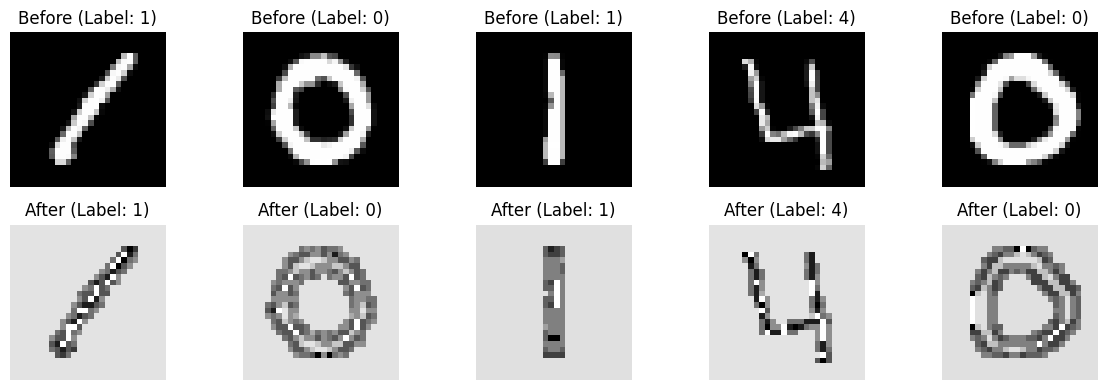

In [ ]:
# Отображение изображений до и после преобразования
num_images = 5
fig, axs = plt.subplots(2, num_images, figsize=(12, 4))
for i in range(num_images):
    axs[0, i].imshow(train_img[i], cmap='gray')
    axs[0, i].axis('off')
    axs[0, i].set_title("Before (Label: {})".format(train_label[i]))

    axs[1, i].imshow(X_LBP[i].reshape(train_img[i].shape), cmap='gray')
    axs[1, i].axis('off')
    axs[1, i].set_title("After (Label: {})".format(train_label[i]))

plt.tight_layout()
plt.show()

In [ ]:
# Разбиваем выборку на обучение и валидацию
X_train, X_val, y_train, y_val = train_test_split(X_LBP, train_label, test_size=0.2, random_state=42)

In [ ]:
svm_LBP = svm.SVC()

In [ ]:
svm_LBP.fit(X_train, y_train)

SVC()

In [ ]:
y_pred_LBP = svm_LBP.predict(X_val)

In [ ]:
LBP_accuracy = accuracy_score(y_val, y_pred_LBP)

In [ ]:
print("Accuracy:", LBP_accuracy)

Accuracy: 0.9386904761904762


In [ ]:
print(classification_report(y_val, y_pred_LBP))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96       816
           1       0.97      0.98      0.98       909
           2       0.95      0.93      0.94       846
           3       0.92      0.91      0.91       937
           4       0.93      0.93      0.93       839
           5       0.94      0.91      0.93       702
           6       0.94      0.97      0.96       785
           7       0.96      0.93      0.94       893
           8       0.91      0.92      0.92       835
           9       0.90      0.92      0.91       838

    accuracy                           0.94      8400
   macro avg       0.94      0.94      0.94      8400
weighted avg       0.94      0.94      0.94      8400



#Гистограмма градиентов (Histogram of Oriented Gradients, HOG)

Гистограмма градиентов (Histogram of Oriented Gradients, HOG) - это метод предобработки изображений, который широко используется для извлечения текстурных и формовых признаков. HOG представляет собой дескриптор, который описывает локальные градиенты интенсивности пикселей на изображении.

Процесс вычисления HOG состоит из следующих шагов:

1. Предобработка изображения: Изначально, изображение преобразуется в черно-белый формат (если оно не было в таком формате) и может быть сглажено с помощью фильтра Гаусса для уменьшения шума и деталей.

2. Вычисление градиентов: Для каждого пикселя в изображении, вычисляются градиенты интенсивности по горизонтальному и вертикальному направлениям. Это может быть сделано с помощью оператора Собеля или других алгоритмов вычисления градиентов. Градиенты представляют собой векторы, указывающие на направление и интенсивность изменения яркости.

3. Разделение изображения на ячейки (Cell): Изображение разделяется на неперекрывающиеся ячейки фиксированного размера. Ячейки могут быть квадратными или прямоугольными и имеют размер в пикселях.

4. Вычисление гистограммы градиентов в ячейках: Для каждой ячейки вычисляется гистограмма ориентированных градиентов. Градиенты каждого пикселя в ячейке вкладываются в гистограмму, основываясь на их направлениях. Обычно, гистограмма разбивается на несколько корзин (bins), которые охватывают диапазон возможных направлений градиентов. Часто используется 9 бинов, чтобы учесть градиенты в 9 диапазонах направлений.

5. Нормализация блоков (Block Normalization): Для повышения устойчивости и инвариантности к изменениям освещения, гистограммы градиентов в нескольких соседних ячейках объединяются в блоки. Обычно используется перекрытие между блоками, чтобы учесть информацию о градиентах из соседних областей. Затем гистограммы внутри каждого блока нормализуются, например, с использованием метода L2-нормализации.

6. Сбор всех гистограмм: Наконец, все нормализованные гистограммы объединяются в единый вектор признаков, который представляет собой дескриптор HOG для всего изображения.

HOG-дескрипторы могут быть использованы для обнаружения и классификации объектов на изображении. Они позволяют выделять формовые особенности объектов, такие как границы, углы и текстуры. Классификаторы, такие как метод опорных векторов (SVM), могут быть обучены на этих признаках для классификации объектов на основе их формовых характеристик.

HOG предоставляет хорошие результаты на изображениях, содержащих текстурные или формовые особенности, и является широко используемым методом в области компьютерного зрения.

In [ ]:
winSize = (4,4)
blockSize = (4,4)
blockStride = (4,4)
cellSize = (2,2)
nbins = 9
derivAperture = 1
winSigma = 4.
histogramNormType = 0
L2HysThreshold = 2.0000000000000001e-01
gammaCorrection = 0
nlevels = 64

hog = cv2.HOGDescriptor(winSize,
                        blockSize,
                        blockStride,
                        cellSize,
                        nbins,
                        derivAperture,
                        winSigma,
                        histogramNormType,
                        L2HysThreshold,
                        gammaCorrection,
                        nlevels)

In [ ]:
# Предобработка данных
X_processed = []
for image in train_img:

    # Вычисление гистограммы градиентов (HOG)
    hog_features = hog.compute(np.uint8(image))
    X_processed.append(hog_features)

X_HOG = np.array(X_processed)

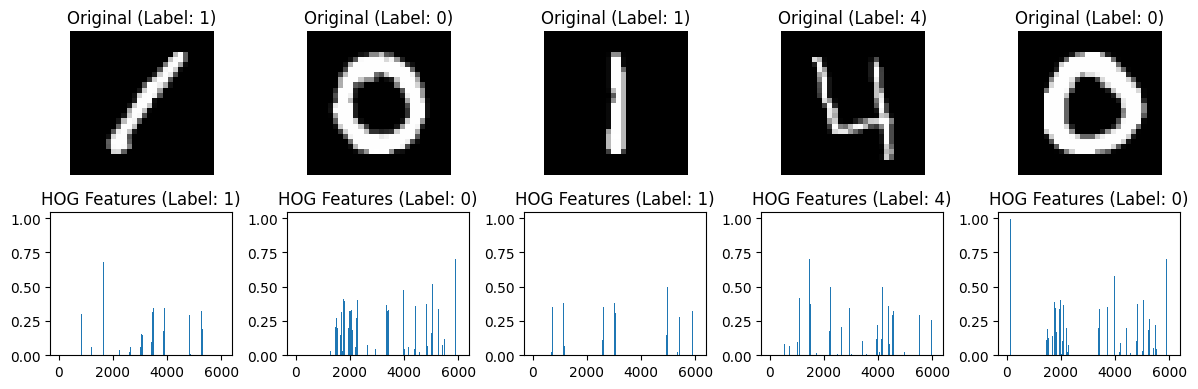

In [ ]:
# Отображение изображений до и после преобразования
num_images = 5
fig, axs = plt.subplots(2, num_images, figsize=(12, 4))
for i in range(num_images):
    axs[0, i].imshow(train_img[i], cmap='gray')
    axs[0, i].axis('off')
    axs[0, i].set_title("Original (Label: {})".format(train_label[i]))

    axs[1, i].bar(range(len(X_HOG[i])), X_HOG[i])
    axs[1, i].set_title("HOG Features (Label: {})".format(train_label[i]))

plt.tight_layout()
plt.show()

In [ ]:
# Разбиваем выборку на обучение и валидацию
X_train, X_val, y_train, y_val = train_test_split(X_HOG, train_label, test_size=0.2, random_state=42)

In [ ]:
svm_HOG = svm.SVC()

In [ ]:
svm_HOG.fit(X_train, y_train)

SVC()

In [ ]:
y_pred_HOG = svm_HOG.predict(X_val)

In [ ]:
HOG_accuracy = accuracy_score(y_val, y_pred_HOG)

In [ ]:
print("Accuracy:", HOG_accuracy)

Accuracy: 0.9903571428571428


In [ ]:
print(classification_report(y_val, y_pred_HOG))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       816
           1       0.99      1.00      0.99       909
           2       0.99      0.99      0.99       846
           3       0.99      0.98      0.99       937
           4       1.00      0.99      0.99       839
           5       0.99      0.99      0.99       702
           6       0.99      0.99      0.99       785
           7       0.99      0.99      0.99       893
           8       0.98      0.99      0.98       835
           9       0.99      0.98      0.99       838

    accuracy                           0.99      8400
   macro avg       0.99      0.99      0.99      8400
weighted avg       0.99      0.99      0.99      8400



#Метод главных компонент (PCA)

Метод главных компонент (Principal Component Analysis, PCA) является одним из наиболее распространенных методов для снижения размерности данных. Он позволяет найти новые некоррелированные переменные, называемые главными компонентами, путем проекции данных на новое пространство с меньшей размерностью.

Основные шаги метода PCA:

1. Стандартизация данных: Если переменные в исходных данных имеют различные масштабы, необходимо провести их стандартизацию, чтобы они имели среднее значение 0 и стандартное отклонение 1. Это позволяет уравновесить влияние разных переменных при вычислении ковариационной матрицы.

2. Вычисление ковариационной матрицы: Ковариационная матрица представляет собой квадратную матрицу, в которой каждый элемент показывает ковариацию между двумя переменными. Она используется для анализа связей и зависимостей между переменными.

3. Вычисление собственных значений и собственных векторов: Собственные значения и собственные векторы являются результатами анализа ковариационной матрицы. Собственные значения представляют собой меру важности главных компонент, а собственные векторы - направления этих компонент в исходном пространстве переменных.

4. Сортировка главных компонент: Главные компоненты сортируются в порядке убывания собственных значений. Таким образом, первая главная компонента содержит наибольшую долю дисперсии в данных, вторая - следующую по величине долю дисперсии, и так далее.

5. Выбор количества компонент: Для выбора оптимального количества главных компонент можно использовать метод объясненной дисперсии. Этот метод позволяет определить, сколько главных компонент необходимо для сохранения достаточного количества информации в данных.

6. Проекция данных на новое пространство: Финальный шаг - проецирование исходных данных на пространство главных компонент. Полученные значения являются новыми признаками, которые могут быть использованы для обучения моделей машинного обучения или визуализации данных.

Метод PCA широко применяется для снижения размерности данных, удаления шума, визуализации данных, изучения взаимосвязей между переменными и сокращения вычислительной сложности алгоритмов машинного обучения.

В библиотеке OpenCV (`cv2`), PCA реализована в функции `cv2.PCACompute()` для работы с матрицами и изображениями.

In [ ]:
# Предобработка данных
X_processed = train_img.reshape(-1, 784).astype(np.float32)  # Преобразование в 2D массив и тип данных np.float32

In [ ]:
# Преобразование признаков с помощью PCA
pca = cv2.PCACompute(X_processed, mean=None, maxComponents=50)[1]
X_pca = np.dot(X_processed - np.mean(X_processed, axis=0), pca.T)

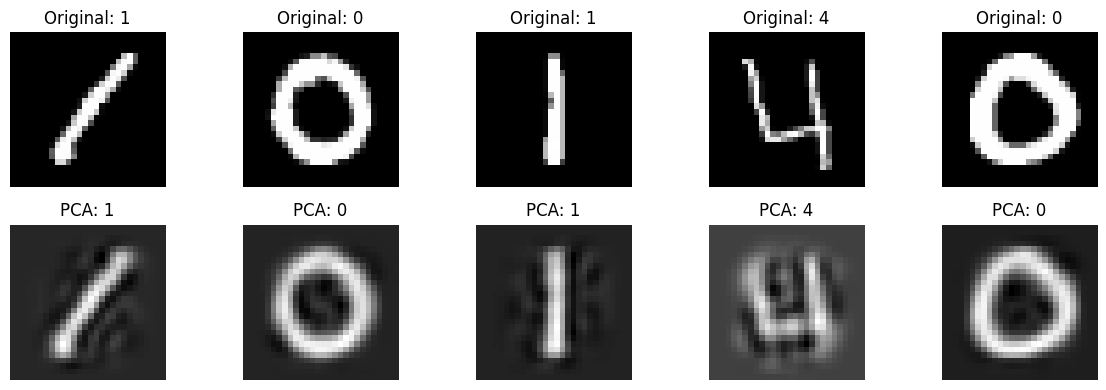

In [ ]:
# Отображение изображений до и после преобразования
num_images = 5
fig, axs = plt.subplots(2, num_images, figsize=(12, 4))
for i in range(num_images):
    axs[0, i].imshow(train_img[i], cmap='gray')
    axs[0, i].axis('off')
    axs[0, i].set_title(f"Original: {train_label[i]}")

    reshaped_image = (np.dot(pca.T, X_pca[i]) + np.mean(X_processed, axis=0)).reshape(28, 28)
    axs[1, i].imshow(reshaped_image, cmap='gray')
    axs[1, i].axis('off')
    axs[1, i].set_title(f"PCA: {train_label[i]}")

plt.tight_layout()
plt.show()

In [ ]:
X_train, X_val, y_train, y_test = train_test_split(X_pca, train_label, test_size=0.2, random_state=42)

In [ ]:
svm_PCA = svm.SVC()

In [ ]:
svm_PCA.fit(X_train, y_train)

SVC()

In [ ]:
y_pred_PCA = svm_PCA.predict(X_val)

In [ ]:
PCA_accuracy = accuracy_score(y_val, y_pred_PCA)

In [ ]:
print("Accuracy:", PCA_accuracy)

Accuracy: 0.9777380952380952


In [ ]:
print(classification_report(y_test, y_pred_PCA))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       816
           1       0.99      0.99      0.99       909
           2       0.98      0.98      0.98       846
           3       0.98      0.97      0.97       937
           4       0.97      0.97      0.97       839
           5       0.98      0.97      0.97       702
           6       0.98      0.99      0.99       785
           7       0.98      0.97      0.98       893
           8       0.97      0.98      0.98       835
           9       0.96      0.97      0.97       838

    accuracy                           0.98      8400
   macro avg       0.98      0.98      0.98      8400
weighted avg       0.98      0.98      0.98      8400



#Фильтры Габора (Gabor filters)

Gabor-фильтры являются одним из методов обработки изображений, основанных на анализе текстур. Они получают свое название от имени Дениса Габора, ученого, который разработал этот метод. Gabor-фильтры применяются для выделения текстурных особенностей изображений и могут быть использованы в различных задачах компьютерного зрения, таких как распознавание образов и детектирование объектов.

Основная идея Gabor-фильтров заключается в использовании комплексных ядер Габора для анализа различных частот и ориентаций в изображении. Комплексное ядро Габора представляет собой сумму вещественной и мнимой частей, которые определяют форму и ориентацию фильтра.

Ключевые параметры Gabor-фильтров включают:

1. Частоту: Определяет количество колебаний фильтра вдоль оси x и y в изображении. Высокие частоты обнаруживают тонкие детали текстуры, тогда как низкие частоты обнаруживают более крупные особенности.

2. Ориентацию: Определяет направление колебаний фильтра. Можно использовать несколько фильтров Габора с разными ориентациями для обнаружения текстур в разных направлениях.

3. Размер ядра: Определяет размер области, в которой происходит анализ текстур. Больший размер ядра позволяет обнаруживать более крупные текстурные особенности.

4. Аспектное отношение: Определяет форму ядра фильтра. Значение 1 соответствует круговому ядру, а значения меньше 1 или больше 1 создают ядра с эллиптической формой.

Применение Gabor-фильтров к изображению включает следующие шаги:

1. Определение параметров фильтра: Задание частоты, ориентации, размера ядра и аспектного отношения.

2. Создание фильтра: С использованием заданных параметров создается комплексное ядро Габора с помощью функции `cv2.getGaborKernel()` из библиотеки cv2.

3. Применение фильтра: Фильтр Габора применяется к исходному изображению с помощью функции `cv2.filter2D()` из библиотеки cv2. Результатом является изображение, содержащее информацию о текстурных особенностях в соответствии с заданными параметрами фильтра.

Gabor-фильтры широко применяются для анализа текстурных особенностей в различных областях, таких как компьютерное зрение, распознавание образов, анализ лиц, детектирование объектов и другие. Они позволяют выделять различные текстурные шаблоны в изображениях, что делает их полезными для множества задач обработки изображений и компьютерного зрения.

In [ ]:
X_processed = train_img.astype(np.float32)  # Преобразование типа данных в np.float32

In [ ]:
# Преобразование признаков с помощью Gabor filters
ksize = 14  # Размер ядра фильтра Габора
sigma = 4.0  # Стандартное отклонение Гауссовой функции
theta = np.pi / 4  # Угол ориентации фильтра
lambda_ = 8.0  # Длина волны
gamma = 0.5  # Аспектное отношение
psi = 0  # Фазовый сдвиг

In [ ]:
filters = []
for i in range(10):
    gabor_filter = cv2.getGaborKernel((ksize, ksize), sigma, theta, lambda_, gamma, psi, cv2.CV_32F)
    filters.append(gabor_filter)

In [ ]:
X_gabor = []
for image in X_processed:
    filtered_images = []
    for gabor_filter in filters:
        filtered_image = cv2.filter2D(image, cv2.CV_32F, gabor_filter)
        filtered_images.append(filtered_image.flatten())
    X_gabor.append(np.concatenate(filtered_images))

X_gabor = np.array(X_gabor)

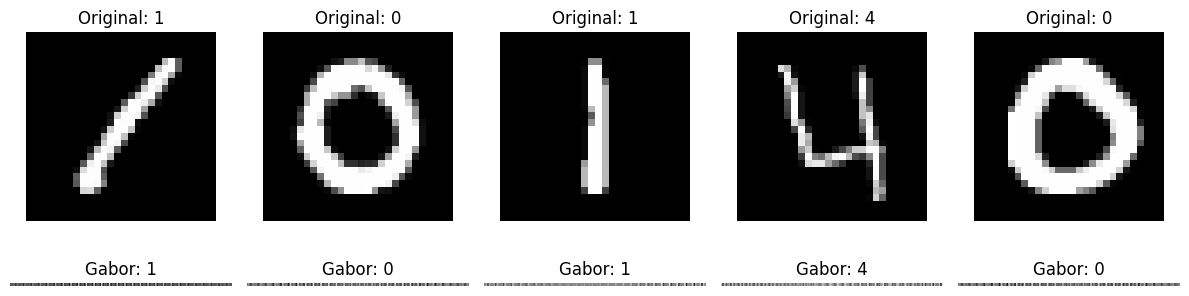

In [ ]:
# Отображение изображений до и после преобразования
num_images = 5
fig, axs = plt.subplots(2, num_images, figsize=(12, 4))
for i in range(num_images):
    axs[0, i].imshow(train_img[i], cmap='gray')
    axs[0, i].axis('off')
    axs[0, i].set_title(f"Original: {train_label[i]}")

    reshaped_image = X_gabor[i].reshape(10, -1)
    axs[1, i].imshow(reshaped_image, cmap='gray')
    axs[1, i].axis('off')
    axs[1, i].set_title(f"Gabor: {train_label[i]}")

plt.tight_layout()
plt.show()

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_gabor, train_label, test_size=0.2, random_state=42)

In [ ]:
svm_Gabor = svm.SVC()

In [ ]:
svm_Gabor.fit(X_train, y_train)

SVC()

In [ ]:
y_pred_Gabor = svm_Gabor.predict(X_val)

In [ ]:
Gabor_accuracy = accuracy_score(y_val, y_pred_Gabor)

In [ ]:
print("Accuracy:", Gabor_accuracy)

Accuracy: 0.9616666666666667


In [ ]:
print(classification_report(y_val, y_pred_Gabor))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       816
           1       0.98      0.99      0.98       909
           2       0.96      0.95      0.96       846
           3       0.97      0.95      0.96       937
           4       0.96      0.97      0.96       839
           5       0.95      0.97      0.96       702
           6       0.98      0.98      0.98       785
           7       0.96      0.95      0.95       893
           8       0.95      0.95      0.95       835
           9       0.95      0.95      0.95       838

    accuracy                           0.96      8400
   macro avg       0.96      0.96      0.96      8400
weighted avg       0.96      0.96      0.96      8400



#Заключение

Для наглядности создадим датафрейм с результатами

In [ ]:
result = pd.DataFrame({'Метод преобразования':['Local Binary Patterns (LBP)','Histogram of Oriented Gradients, HOG',
                                               'Метод главных компонент (PCA)','Фильтры Габора (Gabor filters)'],
                       'Accuracy':[round(LBP_accuracy,3),round(HOG_accuracy,3),
                                   round(PCA_accuracy,3),round(Gabor_accuracy,3)]})

In [ ]:
result.sort_values('Accuracy', ascending= False)

,Метод преобразования,Accuracy
1,"Histogram of Oriented Gradients, HOG",0.990
2,Метод главных компонент (PCA),0.978
3,Фильтры Габора (Gabor filters),0.962
0,Local Binary Patterns (LBP),0.939


Модель SVM показала лучшие результаты при HOG преобразовании, сделаем предсказание на тестовых данных, сохраним результат и загрузим на Kagle

In [ ]:
# Предобработка данных
X_processed_test = []
for image in test_img:

    # Вычисление гистограммы градиентов (HOG)
    hog_features_test = hog.compute(np.uint8(image))
    X_processed_test.append(hog_features_test)

X_HOG_test = np.array(X_processed_test)

In [ ]:
X_HOG_test.shape

(28000, 6084)

In [ ]:
test_pred_HOG = svm_HOG.predict(X_HOG_test)

In [ ]:
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),pd.Series(test_pred_HOG, name="Label")],axis = 1)

In [ ]:
submission.to_csv("submission.csv",index=False)

In [ ]:
submission.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3


In [ ]:
submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   ImageId  28000 non-null  int64
 1   Label    28000 non-null  int64
dtypes: int64(2)
memory usage: 437.6 KB


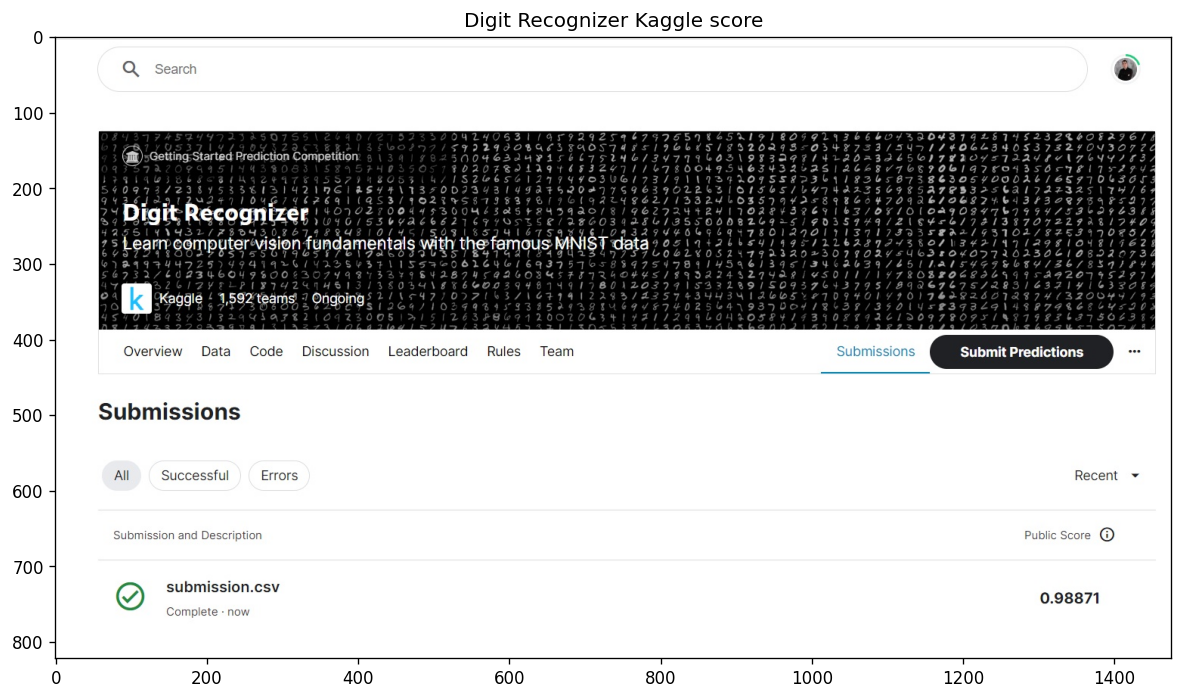

In [ ]:
Digit_Recognizer_Submit = cv2.imread('Digit_Recognizer_Submit.jpg')
plt.figure(figsize= (12,12), dpi= 120)
plt.imshow(cv2.cvtColor(Digit_Recognizer_Submit, cv2.COLOR_BGR2RGB))
plt.title('Digit Recognizer Kaggle score')
plt.show()